## Customer Churn Prediction
*Objective: Predict whether a customer will churn based on their behavior and demographics.*

*Dataset: Telco Customer Churn Dataset*

*Skills: Classification, feature engineering, imbalanced data handling.*

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE


In [182]:
tc = pd.read_excel("Telco_Customer_churn.xlsx")
tc

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


*Exploratory Data Analysis (EDA)*

In [183]:
tc.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [184]:
tc.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [185]:
tc.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [186]:
tc.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [187]:
# Check the distribution of the target variable 'Churn'
print(tc['Churn Value'].value_counts())

Churn Value
0    5174
1    1869
Name: count, dtype: int64


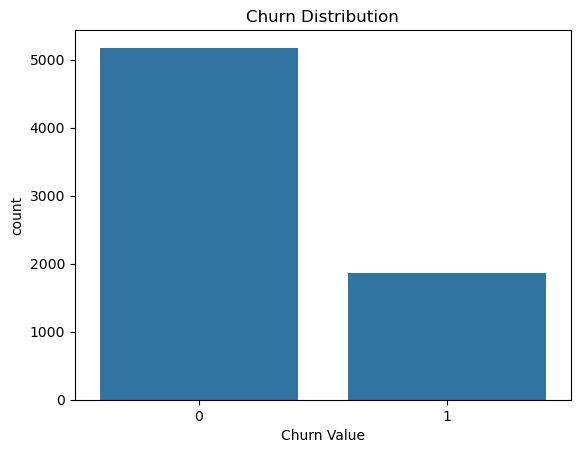

In [188]:
# Visualizing churn distribution
sns.countplot(x='Churn Value', data=tc)
plt.title('Churn Distribution')
plt.show()

## Data Preprocessing
*Handling missing values*

In [189]:
tc.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [190]:
tc["Churn Reason"].mode()

0    Attitude of support person
Name: Churn Reason, dtype: object

In [191]:
tc["Churn Reason"] = tc["Churn Reason"].fillna("Attitude of support person")

In [192]:
tc.isnull().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64

In [193]:
tc.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [194]:
# Convert 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service' etc. into 0/1 values
binary_columns = ['Churn Label','Paperless Billing']
for col in binary_columns:
    tc[col] = tc[col].map({'Yes': 1, 'No': 0})

# Drop irrelevant columns:
tc.drop(columns=['CustomerID', 'Count', 'Lat Long', 'Latitude','City', 'Longitude', 'Zip Code','Country','State'], inplace=True)

# Handle categorical variables:
tc = pd.get_dummies(tc, columns=['Gender', 'Internet Service', 'Contract', 'Payment Method',
                                 'Multiple Lines', 'Online Security', 'Online Backup', 
                                 'Device Protection', 'Tech Support', 'Streaming TV', 
                                 'Streaming Movies'], drop_first=True)

# Display the cleaned data
print(tc.head())

  Senior Citizen Partner Dependents  Tenure Months Phone Service  \
0             No      No         No              2           Yes   
1             No      No        Yes              2           Yes   
2             No      No        Yes              8           Yes   
3             No     Yes        Yes             28           Yes   
4             No      No        Yes             49           Yes   

   Paperless Billing  Monthly Charges Total Charges  Churn Label  Churn Value  \
0                  1            53.85        108.15            1            1   
1                  1            70.70        151.65            1            1   
2                  1            99.65         820.5            1            1   
3                  1           104.80       3046.05            1            1   
4                  1           103.70        5036.3            1            1   

   ...  Online Backup_No internet service  Online Backup_Yes  \
0  ...                              Fals

## Feature Engineering

In [195]:
# Convert columns to numeric and handle errors by setting invalid entries to NaN
for col in numeric_cols:
    tc[col] = pd.to_numeric(tc[col], errors='coerce')  

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to numeric columns
tc[numeric_cols] = scaler.fit_transform(tc[numeric_cols])

# Check the dataset after scaling
print(tc.head())


  Senior Citizen Partner Dependents  Tenure Months Phone Service  \
0             No      No         No      -1.236724           Yes   
1             No      No        Yes      -1.236724           Yes   
2             No      No        Yes      -0.992402           Yes   
3             No     Yes        Yes      -0.177995           Yes   
4             No      No        Yes       0.677133           Yes   

   Paperless Billing  Monthly Charges  Total Charges  Churn Label  \
0                  1        -0.362660      -0.959649            1   
1                  1         0.197365      -0.940457            1   
2                  1         1.159546      -0.645369            1   
3                  1         1.330711       0.336516            1   
4                  1         1.294151       1.214589            1   

   Churn Value  ...  Online Backup_No internet service  Online Backup_Yes  \
0            1  ...                              False               True   
1            1  ...   

## Train-Test Split.

In [196]:
# Define the features (X) and target variable (y)
X = tc.drop(columns=['Churn Label',])  # Features
y = tc['Churn Value']  # Target

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (5634, 34)
Test set shape: (1409, 34)


## Model Building.

In [197]:
# Check if any non-numeric columns are present in X_train and X_test
print(X_train.dtypes)
print(X_test.dtypes)


Senior Citizen                             object
Partner                                    object
Dependents                                 object
Tenure Months                             float64
Phone Service                              object
Paperless Billing                           int64
Monthly Charges                           float64
Total Charges                             float64
Churn Value                                 int64
Churn Score                               float64
CLTV                                      float64
Churn Reason                               object
Gender_Male                                  bool
Internet Service_Fiber optic                 bool
Internet Service_No                          bool
Contract_One year                            bool
Contract_Two year                            bool
Payment Method_Credit card (automatic)       bool
Payment Method_Electronic check              bool
Payment Method_Mailed check                  bool


In [198]:
# Convert binary columns in X_train and X_test to numeric
binary_columns = ['Senior Citizen','Partner','Dependents','Phone Service','Churn Reason','Gender_Male','Internet Service_Fiber optic','Internet Service_No','Contract_One year','Contract_Two year','Payment Method_Credit card (automatic)','Payment Method_Electronic check','Payment Method_Mailed check','Multiple Lines_No phone service','Multiple Lines_Yes','Online Security_No internet service','Online Security_Yes','Online Backup_No internet service','Streaming TV_Yes']

for col in binary_columns:
    if col in X_train.columns:
        X_train[col] = X_train[col].map({'Yes': 1, 'No': 0})
        X_test[col] = X_test[col].map({'Yes': 1, 'No': 0})


## Model Evaluation.

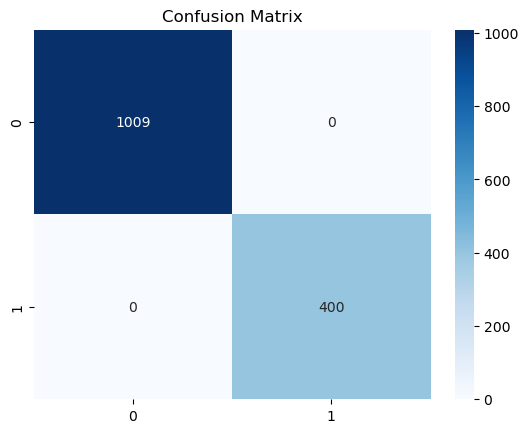

Churn Value
0    5174
1    1869
Name: count, dtype: int64


In [199]:
# Visualize confusion matrix
sns.heatmap(confusion_matrix(y_test, y_test), annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Check for class imbalance
print(y.value_counts())


## handling Imbalanced data.

In [200]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy 
imputer = SimpleImputer(strategy='mean')  

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_imputed, y_train)

# Check class balance after resampling
print(f'Class distribution after resampling:\n{y_train_res.value_counts()}')


Class distribution after resampling:
Churn Value
0    4165
1    4165
Name: count, dtype: int64


## Model training with balanced data.

In [203]:
imputer = SimpleImputer(strategy='mean')  

# Transform both the training and test data
X_train_imputed = imputer.fit_transform(X_train)  # Fit and transform on training data
X_test_imputed = imputer.transform(X_test)        # Only transform the test data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_imputed, y_train)

# Train the Logistic Regression model on the resampled data
lr_resampled = LogisticRegression(random_state=42)
lr_resampled.fit(X_train_res, y_train_res)

# Predict on the imputed test set
y_pred_res = lr_resampled.predict(X_test_imputed)

# Evaluate the model's performance
print(f'Accuracy (resampled): {accuracy_score(y_test, y_pred_res)}')
print(f'Confusion Matrix (resampled):\n{confusion_matrix(y_test, y_pred_res)}')
print(f'Classification Report (resampled):\n{classification_report(y_test, y_pred_res)}')


Accuracy (resampled): 1.0
Confusion Matrix (resampled):
[[1009    0]
 [   0  400]]
Classification Report (resampled):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

